# Group Assignment TO Bike Share Analysis 

First let's read in the excel file to convert it into a dataframe.

Here are some questions I'd like to ask:
1. Which months do the most rides occur in 2014, 2015, 2016?
2. How many users are members and how many are casual?
3. What are the most frequent start times (is it at midnight, midday, evening)? What kind of distribution can we see for start times to graph?
4. Which days are the most frequent days and which are the least frequent days that users use the bike share? What type of distribution can we find for the days of the week to graph? 
5. Which is the most frequent start location? Which is the most frequent end location? Are there any distributions for these locations that we can graph?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# This will ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Our temporal data types
from datetime import datetime
from datetime import timedelta

t2016Q4 = pd.read_excel('2016_Bike_Share_Toronto_Ridership_Q4.xlsx',\
                    names=['trip_id','start','end','duration','from','to','user_type'])

t2016Q3 = pd.read_excel('2016_Bike_Share_Toronto_Ridership_Q3.xlsx',
                       names=['trip_id','start','end','duration','from','to','user_type'])

## Clean the Data for Q4 and Q3 of 2016

In [2]:
t2016Q4['start'] = pd.to_datetime(t2016Q4['start'])
t2016Q3['start'] = pd.to_datetime(t2016Q3['start'])

In [3]:
t2016Q4['end'] = pd.to_datetime(t2016Q4['end'])
t2016Q3['end'] = pd.to_datetime(t2016Q3['end'])

In [4]:
t2016Q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217569 entries, 0 to 217568
Data columns (total 7 columns):
trip_id      217569 non-null int64
start        217569 non-null datetime64[ns]
end          217569 non-null datetime64[ns]
duration     217569 non-null int64
from         217567 non-null object
to           217567 non-null object
user_type    217569 non-null object
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 11.6+ MB


In [5]:
t2016Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367962 entries, 0 to 367961
Data columns (total 7 columns):
trip_id      367962 non-null int64
start        367962 non-null datetime64[ns]
end          367962 non-null datetime64[ns]
duration     367962 non-null int64
from         367959 non-null object
to           367960 non-null object
user_type    367962 non-null object
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 19.7+ MB


In [6]:
t2016Q4[['start','end']].head()

,start,end
0,2016-01-10 00:00:00,2016-01-10 00:07:00
1,2016-01-10 00:00:00,2016-01-10 00:09:00
2,2016-01-10 00:00:00,2016-01-10 00:07:00
3,2016-01-10 00:01:00,2016-01-10 00:27:00
4,2016-01-10 00:01:00,2016-01-10 00:27:00


In [7]:
t2016Q3[['start','end']].head()

,start,end
0,2016-07-09 01:03:00,2016-07-09 01:15:00
1,2016-07-09 02:15:00,2016-07-09 02:22:00
2,2016-07-10 17:04:00,2016-07-10 17:36:00
3,2016-07-11 01:45:00,2016-07-11 01:58:00
4,2016-07-18 13:35:00,2016-07-18 13:42:00


In [8]:
#For start times of Q4 - Clean the datetime values

mask = (pd.PeriodIndex(t2016Q4['start'],freq='Q') != '2016Q4') #get all values that are not within the 
                                                                #2016 Q4 range
s = pd.DatetimeIndex(t2016Q4.loc[mask,'start'].dt.strftime('%Y-%d-%m %H:%M:%S')) #
t2016Q4.loc[mask,'start'] = pd.to_datetime(s)

In [9]:
#For end times of Q4 - Clean the datetime values
mask = (pd.PeriodIndex(t2016Q4['end'],freq='Q') != '2016Q4')
s = pd.DatetimeIndex(t2016Q4.loc[mask,'end'].dt.strftime('%Y-%d-%m %H:%M:%S'))
t2016Q4.loc[mask,'end'] = pd.to_datetime(s)

In [10]:
t2016Q4[['start','end']].head()

,start,end
0,2016-10-01 00:00:00,2016-10-01 00:07:00
1,2016-10-01 00:00:00,2016-10-01 00:09:00
2,2016-10-01 00:00:00,2016-10-01 00:07:00
3,2016-10-01 00:01:00,2016-10-01 00:27:00
4,2016-10-01 00:01:00,2016-10-01 00:27:00


In [11]:
#For start times of Q3 - Clean the datetime values
mask = (pd.PeriodIndex(t2016Q3['start'],freq='Q') != '2016Q3') #get all values that are not within the 
                                                                #2016 Q4 range
s = pd.DatetimeIndex(t2016Q3.loc[mask,'start'].dt.strftime('%Y-%d-%m %H:%M:%S')) #
t2016Q3.loc[mask,'start'] = pd.to_datetime(s)

In [12]:
#For end times of Q3 - Clean the datetime values
mask = (pd.PeriodIndex(t2016Q3['end'],freq='Q') != '2016Q3')
s = pd.DatetimeIndex(t2016Q3.loc[mask,'end'].dt.strftime('%Y-%d-%m %H:%M:%S'))
t2016Q3.loc[mask,'end'] = pd.to_datetime(s)

In [13]:
t2016Q3[t2016Q3.start.dt.year == 2000]

,trip_id,start,end,duration,from,to,user_type
365004,622515,2000-01-01 14:40:00,2000-01-01 15:44:00,3794,Front St / Yonge St (Hockey Hall of Fame),Front St / Yonge St (Hockey Hall of Fame),Member


In [14]:
anomaly = t2016Q3[t2016Q3.start.dt.year == 2000]
anomaly
t2016Q3.drop(anomaly.index, axis='rows',inplace=True)
t2016Q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367961 entries, 0 to 367961
Data columns (total 7 columns):
trip_id      367961 non-null int64
start        367961 non-null datetime64[ns]
end          367961 non-null datetime64[ns]
duration     367961 non-null int64
from         367958 non-null object
to           367959 non-null object
user_type    367961 non-null object
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 22.5+ MB


In [15]:
(t2016Q3[t2016Q3.start.dt.year == 2000])

,trip_id,start,end,duration,from,to,user_type


## Q1: Which months in 2016 had most rides?

### Q4 2016

In [16]:
t2016Q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217569 entries, 0 to 217568
Data columns (total 7 columns):
trip_id      217569 non-null int64
start        217569 non-null datetime64[ns]
end          217569 non-null datetime64[ns]
duration     217569 non-null int64
from         217567 non-null object
to           217567 non-null object
user_type    217569 non-null object
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 11.6+ MB


In [17]:
t2016Q4.head()

,trip_id,start,end,duration,from,to,user_type
0,462305,2016-10-01 00:00:00,2016-10-01 00:07:00,394,Queens Quay W / Dan Leckie Way,Fort York Blvd / Garrison Rd,Casual
1,462306,2016-10-01 00:00:00,2016-10-01 00:09:00,533,Sherbourne St / Wellesley St,Edward St / Yonge St,Member
2,462307,2016-10-01 00:00:00,2016-10-01 00:07:00,383,Queens Quay W / Dan Leckie Way,Fort York Blvd / Garrison Rd,Casual
3,462308,2016-10-01 00:01:00,2016-10-01 00:27:00,1557,Cherry St / Distillery Ln,Fort York Blvd / Capreol Crt,Casual
4,462309,2016-10-01 00:01:00,2016-10-01 00:27:00,1547,Cherry St / Distillery Ln,Fort York Blvd / Capreol Crt,Casual


In [18]:
t2016Q4['start_month'] = t2016Q4.start.dt.month_name()
t2016Q4.head()

,trip_id,start,end,duration,from,to,user_type,start_month
0,462305,2016-10-01 00:00:00,2016-10-01 00:07:00,394,Queens Quay W / Dan Leckie Way,Fort York Blvd / Garrison Rd,Casual,October
1,462306,2016-10-01 00:00:00,2016-10-01 00:09:00,533,Sherbourne St / Wellesley St,Edward St / Yonge St,Member,October
2,462307,2016-10-01 00:00:00,2016-10-01 00:07:00,383,Queens Quay W / Dan Leckie Way,Fort York Blvd / Garrison Rd,Casual,October
3,462308,2016-10-01 00:01:00,2016-10-01 00:27:00,1557,Cherry St / Distillery Ln,Fort York Blvd / Capreol Crt,Casual,October
4,462309,2016-10-01 00:01:00,2016-10-01 00:27:00,1547,Cherry St / Distillery Ln,Fort York Blvd / Capreol Crt,Casual,October


In [19]:
t2016Q4_grp = t2016Q4.groupby(['start_month']).count()
t2016Q4_grp
#t2016Q4_grp.sort_values(by=['start_month'],ascending=False)

,trip_id,start,end,duration,from,to,user_type
start_month,,,,,,,
December,41605,41605,41605,41605,41605,41605,41605
November,78666,78666,78666,78666,78666,78666,78666
October,97298,97298,97298,97298,97296,97296,97298


### Q3 2016 

In [20]:
t2016Q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367961 entries, 0 to 367961
Data columns (total 7 columns):
trip_id      367961 non-null int64
start        367961 non-null datetime64[ns]
end          367961 non-null datetime64[ns]
duration     367961 non-null int64
from         367958 non-null object
to           367959 non-null object
user_type    367961 non-null object
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 22.5+ MB


In [21]:
t2016Q3.head()

,trip_id,start,end,duration,from,to,user_type
0,53279,2016-07-09 01:03:00,2016-07-09 01:15:00,714,Dundas St E / Regent Park Blvd,Danforth Ave / Ellerbeck St,Member
1,53394,2016-07-09 02:15:00,2016-07-09 02:22:00,417,Riverdale Park North (Broadview Ave),Dundas St E / Regent Park Blvd,Member
2,58314,2016-07-10 17:04:00,2016-07-10 17:36:00,1904,Dundas St E / Regent Park Blvd,Queen St W / Close Ave,Member
3,60784,2016-07-11 01:45:00,2016-07-11 01:58:00,784,Union Station,Dundas St E / Regent Park Blvd,Member
4,93164,2016-07-18 13:35:00,2016-07-18 13:42:00,443,Front St W / Blue Jays Way,Front St / Yonge St (Hockey Hall of Fame),Member


In [22]:
t2016Q3['start_month'] = t2016Q3.start.dt.month_name()

In [23]:
t2016Q3.head()

,trip_id,start,end,duration,from,to,user_type,start_month
0,53279,2016-07-09 01:03:00,2016-07-09 01:15:00,714,Dundas St E / Regent Park Blvd,Danforth Ave / Ellerbeck St,Member,July
1,53394,2016-07-09 02:15:00,2016-07-09 02:22:00,417,Riverdale Park North (Broadview Ave),Dundas St E / Regent Park Blvd,Member,July
2,58314,2016-07-10 17:04:00,2016-07-10 17:36:00,1904,Dundas St E / Regent Park Blvd,Queen St W / Close Ave,Member,July
3,60784,2016-07-11 01:45:00,2016-07-11 01:58:00,784,Union Station,Dundas St E / Regent Park Blvd,Member,July
4,93164,2016-07-18 13:35:00,2016-07-18 13:42:00,443,Front St W / Blue Jays Way,Front St / Yonge St (Hockey Hall of Fame),Member,July


## Combine the two datasets 

In [24]:
Q3Q4 = pd.concat([t2016Q3,t2016Q4])
Q3Q4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585530 entries, 0 to 217568
Data columns (total 8 columns):
trip_id        585530 non-null int64
start          585530 non-null datetime64[ns]
end            585530 non-null datetime64[ns]
duration       585530 non-null int64
from           585525 non-null object
to             585526 non-null object
user_type      585530 non-null object
start_month    585530 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 40.2+ MB


In [25]:
months = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,\
         'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
Q3Q4['monthnum'] = Q3Q4['start_month'].apply(lambda x: months[x])
Q3Q4.head()

,trip_id,start,end,duration,from,to,user_type,start_month,monthnum
0,53279,2016-07-09 01:03:00,2016-07-09 01:15:00,714,Dundas St E / Regent Park Blvd,Danforth Ave / Ellerbeck St,Member,July,7
1,53394,2016-07-09 02:15:00,2016-07-09 02:22:00,417,Riverdale Park North (Broadview Ave),Dundas St E / Regent Park Blvd,Member,July,7
2,58314,2016-07-10 17:04:00,2016-07-10 17:36:00,1904,Dundas St E / Regent Park Blvd,Queen St W / Close Ave,Member,July,7
3,60784,2016-07-11 01:45:00,2016-07-11 01:58:00,784,Union Station,Dundas St E / Regent Park Blvd,Member,July,7
4,93164,2016-07-18 13:35:00,2016-07-18 13:42:00,443,Front St W / Blue Jays Way,Front St / Yonge St (Hockey Hall of Fame),Member,July,7


In [26]:
Q3Q4_sorted = Q3Q4.sort_values(by=['monthnum'])
Q3Q4_sorted.head()

,trip_id,start,end,duration,from,to,user_type,start_month,monthnum
0,53279,2016-07-09 01:03:00,2016-07-09 01:15:00,714,Dundas St E / Regent Park Blvd,Danforth Ave / Ellerbeck St,Member,July,7
113490,84604,2016-07-16 17:10:00,2016-07-16 17:19:00,509,Queen St W / Portland St,Simcoe St / Queen St W,Member,July,7
113491,39782,2016-07-05 21:27:00,2016-07-05 21:40:00,801,Simcoe St / Dundas St W,Fort York Blvd / Capreol Crt,Member,July,7
113492,42112,2016-07-06 13:16:00,2016-07-06 13:28:00,743,Fort York Blvd / Capreol Crt,Simcoe St / Dundas St W,Member,July,7
113493,46270,2016-07-07 13:14:00,2016-07-07 13:27:00,733,Fort York Blvd / Capreol Crt,Simcoe St / Dundas St W,Member,July,7


In [27]:
Q3Q4_grp = Q3Q4_sorted.groupby(['monthnum','user_type']).count()
Q3Q4_grp

trip_id  start    end  duration   from     to  start_month
monthnum user_type                                                            
7        Casual       41366  41366  41366     41366  41366  41366        41366
         Member       66018  66018  66018     66018  66018  66018        66018
8        Casual       45960  45960  45960     45960  45960  45960        45960
         Member       84477  84477  84477     84477  84477  84477        84477
9        Casual       35158  35158  35158     35158  35157  35157        35158
         Member       94982  94982  94982     94982  94980  94981        94982
10       Casual       16770  16770  16770     16770  16769  16769        16770
         Member       80528  80528  80528     80528  80527  80527        80528
11       Casual        7050   7050   7050      7050   7050   7050         7050
         Member       71616  71616  71616     71616  71616  71616        71616
12       Casual        2534   2534   2534      2534   2534   2534         2534
         Member       39071  39071  39071     39071  39071  39071        39071

In [28]:
#plt.style.use(style='seaborn')

#n_grp = Q3Q4_grp['']
Y = Q3Q4_grp['start'].unstack() #This will separate Casual vs Member based on start time counts
Y
#X = np.arange() 
#fig, ax = plt.subplots(figsize=(20,10))

#Q3Q4_grp['start'].unstack().plot(kind='bar')

user_type,Casual,Member
monthnum,,
7,41366,66018
8,45960,84477
9,35158,94982
10,16770,80528
11,7050,71616
12,2534,39071


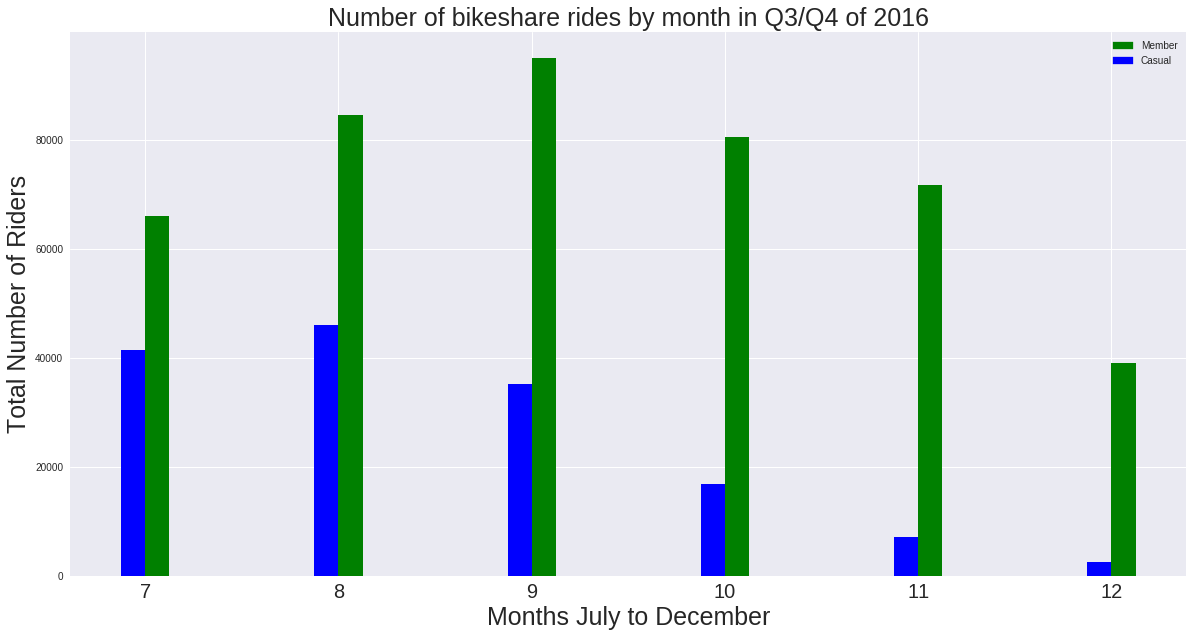

In [29]:
import matplotlib.patches as mpatches
plt.style.use(style='seaborn')
fig, ax = plt.subplots(figsize=(20,10))

n_grp = Q3Q4_grp['start'].unstack().Casual.size
x_pos = np.arange(n_grp)

width = 0.25

ax.set(xticks=x_pos+width/4,xticklabels=Q3Q4_grp.unstack().index)

ax.set_title('Number of bikeshare rides by month in Q3/Q4 of 2016', fontsize=25)
ax.set_xlabel('Months July to December', fontsize=25)
ax.set_xticklabels(Q3Q4_grp.unstack().index,fontdict={'fontsize':20})
ax.set_ylabel('Total Number of Riders', fontsize=25)

#Patches
green_patch = mpatches.Patch(color='green',label='Member')
blue_patch = mpatches.Patch(color='blue',label='Casual')

ax.bar(x_pos, Q3Q4_grp['start'].unstack().Casual, width/2, color='blue',\
       align='center',label='months')
ax.bar(x_pos+width/2, Q3Q4_grp['start'].unstack().Member, width/2, color='green',\
       align='center',label='months')
plt.legend(handles=[green_patch,blue_patch])
plt.show();

## Machine Learning - Training model to check whether Member or Casual 

X = Months
Y = Member/Casual Rider Count

In [30]:
Yc = Q3Q4_grp['start'].unstack().Casual
Ym = Q3Q4_grp['start'].unstack().Member
X = np.arange(Q3Q4_grp['start'].unstack().Casual.size)

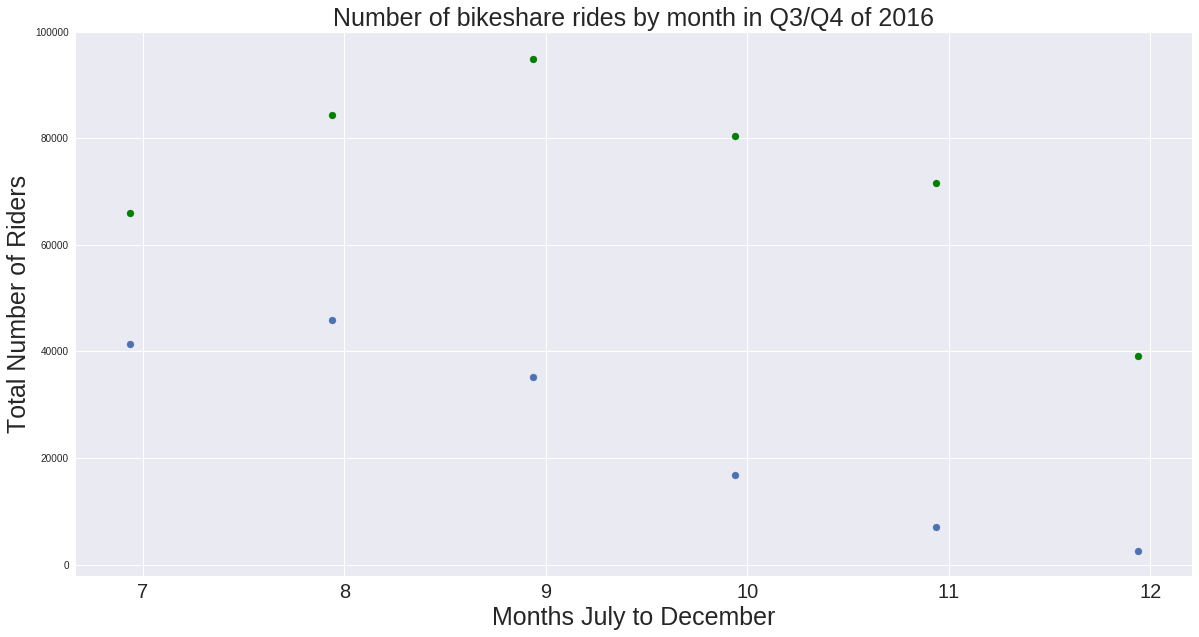

In [31]:
f, ax = plt.subplots(figsize=(20,10))

ax.set(title='Number of bikeshare rides by month in Q3/Q4 of 2016',\
      xticks=x_pos+width/4,\
      xticklabels=Q3Q4_grp.unstack().index,\
      xlabel='Months July to December',\
      ylabel='Total number of riders')

ax.set_title('Number of bikeshare rides by month in Q3/Q4 of 2016', fontsize=25)
ax.set_xlabel('Months July to December', fontsize=25)
ax.set_xticklabels(Q3Q4_grp.unstack().index,fontdict={'fontsize':20})
ax.set_ylabel('Total Number of Riders', fontsize=25)

ax.scatter(X,Yc,label='Casual')
ax.scatter(X,Ym,label='Member',color='green');

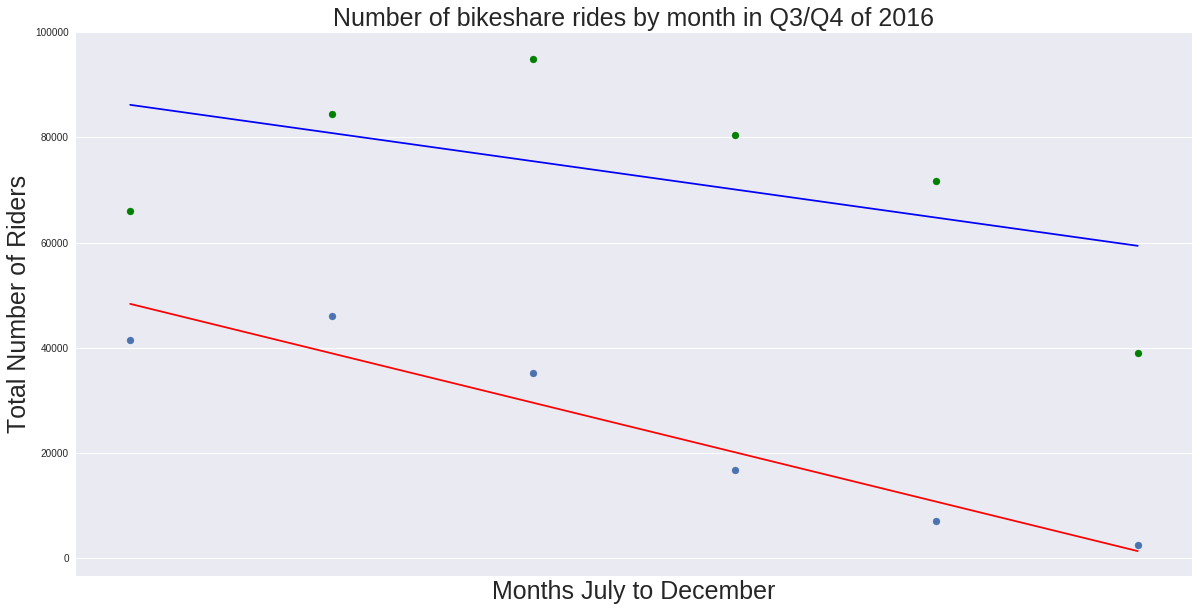

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

#First model - Linear Regression Model
#Step 1 - Get the variables
X = Q3Q4_grp.unstack().index.values.reshape(-1,1)
Yc = Q3Q4_grp['start'].unstack().Casual
Ym = Q3Q4_grp['start'].unstack().Member

#Step 2 - Train the model you want
lin_modelc = LinearRegression().fit(X,Yc)
lin_modelm = LinearRegression().fit(X,Ym)

#Step 3 - Test the model by plotting the regression line
f, ax = plt.subplots(figsize=(20,10))

ax.set(title='Number of bikeshare rides by month in Q3/Q4 of 2016',\
      xticks=x_pos+width/4,\
      xticklabels=Q3Q4_grp.unstack().index,\
      xlabel='Months July to December',\
      ylabel='Total number of riders')

ax.set_title('Number of bikeshare rides by month in Q3/Q4 of 2016', fontsize=25)
ax.set_xlabel('Months July to December', fontsize=25)
ax.set_xticklabels(Q3Q4_grp.unstack().index,fontdict={'fontsize':20})
ax.set_ylabel('Total Number of Riders', fontsize=25)

ax.scatter(X,Yc,label='Casual')
ax.plot(X,lin_modelc.predict(X),color='r')
ax.scatter(X,Ym,label='Member',color='green')
ax.plot(X,lin_modelm.predict(X),color='b');